In [2]:
import pandas as pd
import numpy as np

In [3]:
path="C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/1)Linear Regression/Assignment Given/emp_data.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [6]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


# Define Target & Independent Variable

In [29]:
X=df["Salary_hike"]

In [30]:
y=df["Churn_out_rate"]

In [21]:
# As we have less number of data. We will not split the data into Train & Test Dataset

In [10]:
import seaborn as sns 

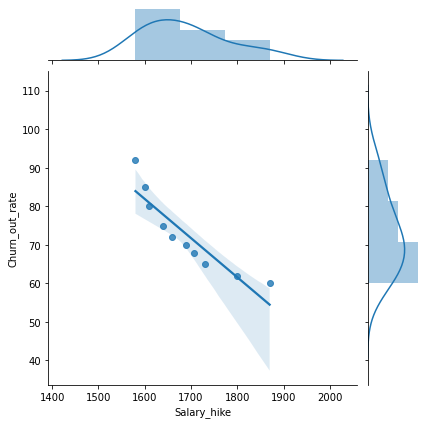

In [31]:
sns.jointplot(X,y, kind="reg" )

In [ ]:
# Lets use Statsmodel as well as Sklearn package to determine the Regression values

### Statsmodels

In [32]:
import statsmodels.api as sm


In [33]:
constant=sm.add_constant(X)

In [34]:
lm_sm=sm.OLS(y,constant).fit()

In [35]:
lm_sm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           0.000239
Time:                        22:58:45   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lets convert X into LogX 

In [36]:
lm_sm_log=sm.OLS(y,np.log(constant)).fit()

In [37]:
lm_sm_log.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              459.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                    4.92e-09
Time:                        22:58:54   Log-Likelihood:                         -37.406
No. Observations:                  10   AIC:                                      76.81
Df Residuals:                       9   BIC:                                      77.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const                0          0        nan        nan           0           0
Salary_hike     9.8024      0.457     21.438      0.000       8.768      10.837
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.652
Skew:                           0.493   Prob(JB):                        0.722
Kurtosis:                       2.231   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Sklearn

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr_sk=LinearRegression(normalize=True)

In [44]:
X_2d=df[["Salary_hike"]]

In [45]:
lr_sk.fit(X_2d,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [46]:
print(lr_sk.intercept_, lr_sk.coef_)

244.36491110400794 [-0.10154265]


In [47]:
pd.DataFrame(lr_sk.predict(X_2d))

,0
0,83.927531
1,81.896678
2,80.881252
3,77.834973
4,75.804120
5,72.757840
6,71.133158
7,68.696134
8,61.588149
9,54.480164
